In [1]:
#getting and working with data
import pandas as pd
import numpy as np
import re
import os

#visualizing results
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context("poster")
sns.set_style("ticks")

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 15000)
pd.set_option('display.max_colwidth', -1)

import warnings; warnings.simplefilter('ignore')
np.set_printoptions(suppress=True)

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn import metrics
from sklearn.manifold import TSNE

from sklearn.cluster import KMeans

from skimage.draw import ellipse
from skimage.measure import find_contours, approximate_polygon, subdivide_polygon

import slideio

/Users/abbieschindler/opt/anaconda3/envs/analysis/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.


### Use slideio and coordinates

['Thumbnail', 'Label', 'Macro']


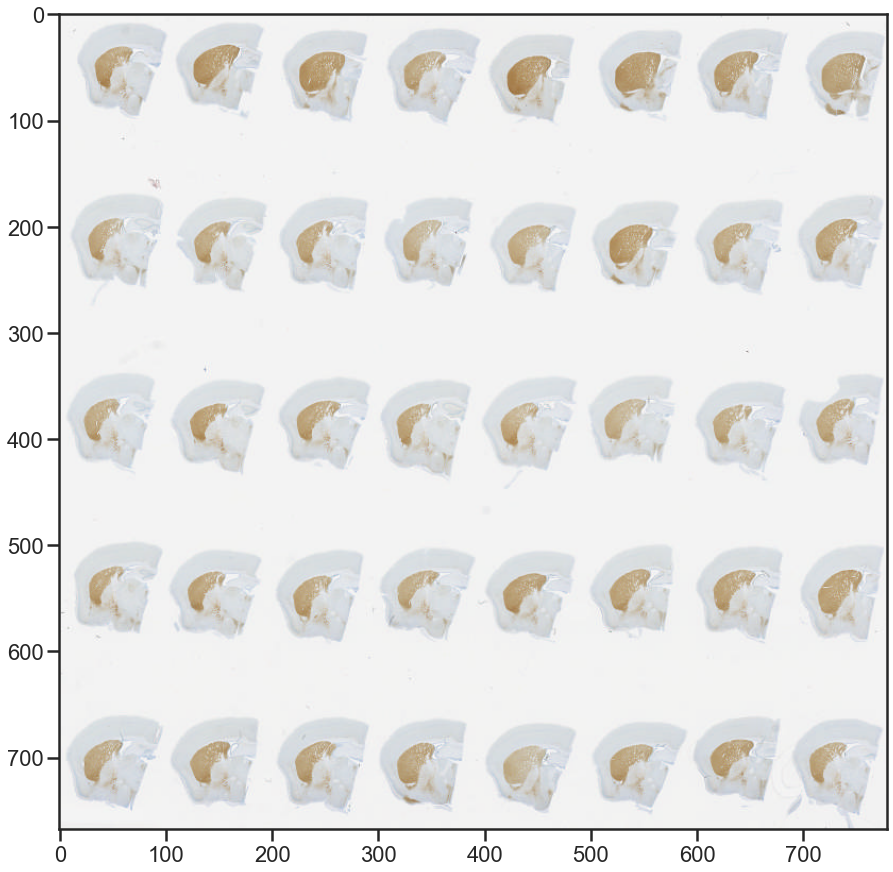

(0, 0, 94248, 92833)


In [67]:
path = '/Users/abbieschindler/Downloads/TH_17.svs'

slide = slideio.open_slide(path, "SVS")
print(slide.get_aux_image_names())

plt.figure(figsize=(15,15))
plt.imshow(slide.get_aux_image_raster('Thumbnail'))
plt.show()

scene = slide.get_scene(0)
print(scene.rect)


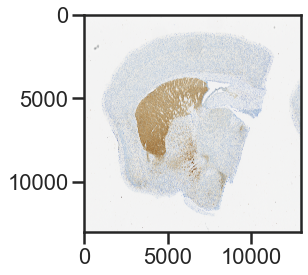

In [106]:
#1A
image_1_a = scene.read_block(rect=(1000, 0, 13000, 13000), channel_indices=[], slices=(0, 0), frames=(0, 1))
plt.imshow(image_1_a)
plt.show()

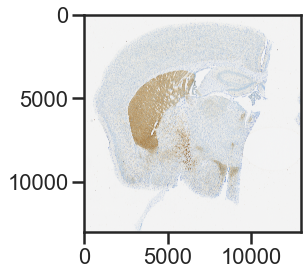

In [134]:
#2A
image_2_a = scene.read_block(rect=(700, 20000, 13000, 13000), channel_indices=[], slices=(0, 0), frames=(0, 1))
plt.imshow(image_2_a)
plt.show()

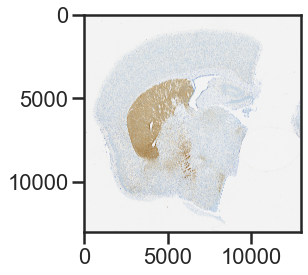

In [136]:
#3A
image_3_a = scene.read_block(rect=(300, 40000, 13000, 13000), channel_indices=[], slices=(0, 0), frames=(0, 1))
plt.imshow(image_3_a)
plt.show()

### Use sklearn to find sections

Text(0.5, 1.0, 'histogram of gray values')

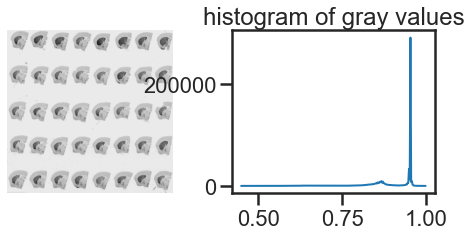

In [111]:
from skimage import data
from skimage.exposure import histogram

from skimage.color import rgb2gray

image = slide.get_aux_image_raster('Thumbnail')

image_gray = rgb2gray(image)

coins = image_gray
hist, hist_centers = histogram(coins)

fig, axes = plt.subplots(1, 2, figsize=(8, 3))
axes[0].imshow(coins, cmap=plt.cm.gray)
axes[0].axis('off')
axes[1].plot(hist_centers, hist, lw=2)
axes[1].set_title('histogram of gray values')

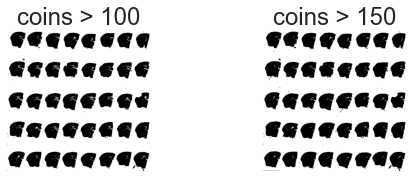

In [112]:
fig, axes = plt.subplots(1, 2, figsize=(8, 3), sharey=True)

axes[0].imshow(coins > .9, cmap=plt.cm.gray)
axes[0].set_title('coins > 100')

axes[1].imshow(coins > .92, cmap=plt.cm.gray)
axes[1].set_title('coins > 150')

for a in axes:
    a.axis('off')

plt.tight_layout()

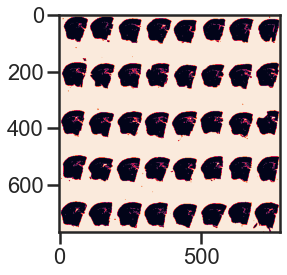

In [115]:
plt.imshow(coins>.9)

(-0.5, 778.5, 767.5, -0.5)

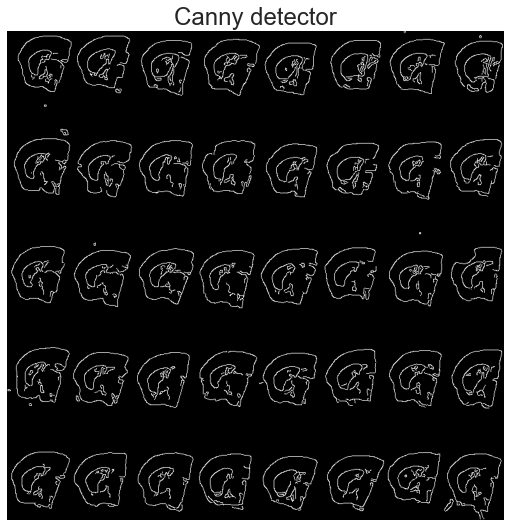

In [79]:
from skimage.feature import canny

edges = canny(coins)

fig, ax = plt.subplots(figsize=(9,9))
ax.imshow(edges, cmap=plt.cm.gray)
ax.set_title('Canny detector')
ax.axis('off')

(-0.5, 778.5, 767.5, -0.5)

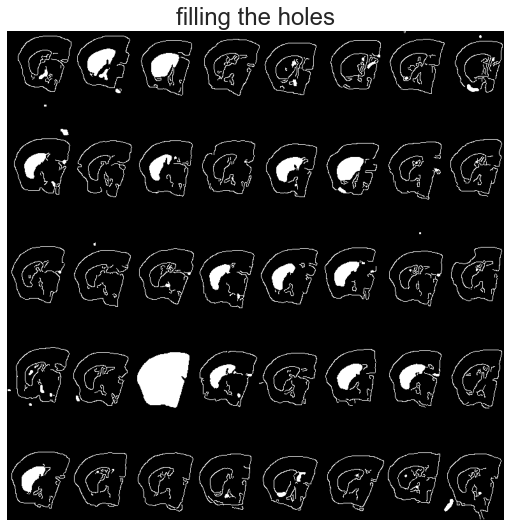

In [80]:
from scipy import ndimage as ndi

fill_coins = ndi.binary_fill_holes(edges)

fig, ax = plt.subplots(figsize=(9,9))
ax.imshow(fill_coins, cmap=plt.cm.gray)
ax.set_title('filling the holes')
ax.axis('off')

(-0.5, 778.5, 767.5, -0.5)

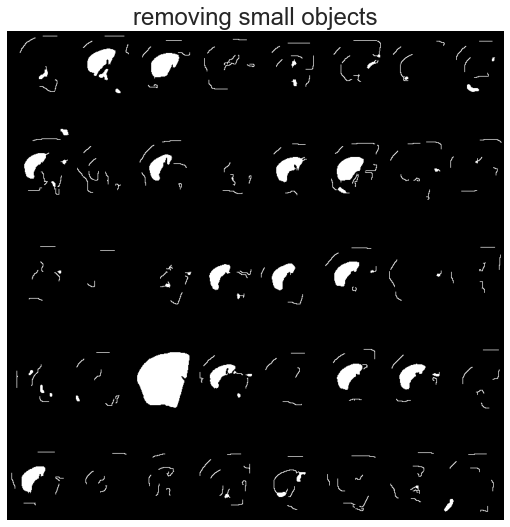

In [81]:
from skimage import morphology

coins_cleaned = morphology.remove_small_objects(fill_coins, 21)

fig, ax = plt.subplots(figsize=(9,9))
ax.imshow(coins_cleaned, cmap=plt.cm.gray)
ax.set_title('removing small objects')
ax.axis('off')

(-0.5, 778.5, 767.5, -0.5)

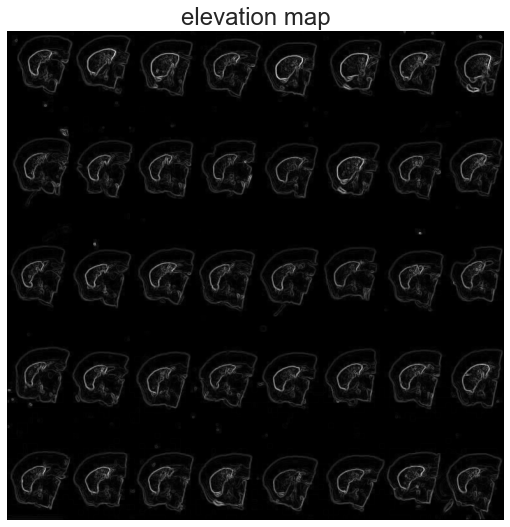

In [82]:
from skimage.filters import sobel

elevation_map = sobel(coins)

fig, ax = plt.subplots(figsize=(9,9))
ax.imshow(elevation_map, cmap=plt.cm.gray)
ax.set_title('elevation map')
ax.axis('off')

(-0.5, 778.5, 767.5, -0.5)

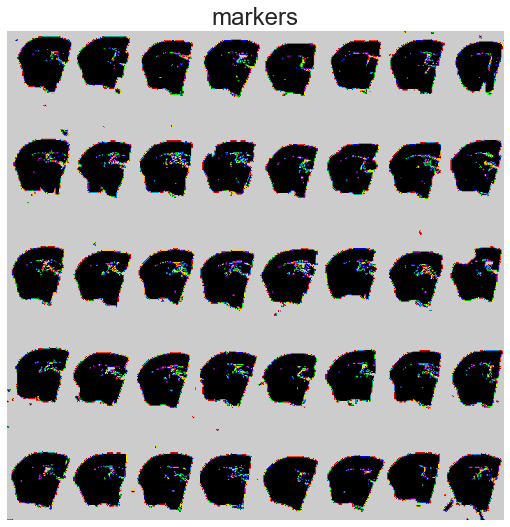

In [129]:
markers = np.zeros_like(coins)
markers[coins < .99] = 1
markers[coins > .9] = 2

fig, ax = plt.subplots(figsize=(9,9))
ax.imshow(markers, cmap=plt.cm.nipy_spectral)
ax.set_title('markers')
ax.axis('off')

(-0.5, 778.5, 767.5, -0.5)

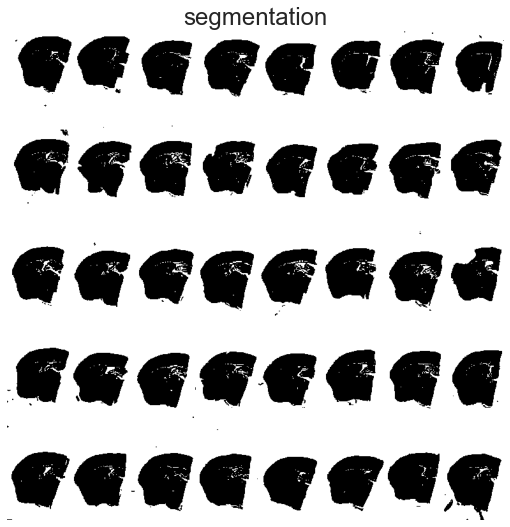

In [130]:
from skimage import segmentation

segmentation_coins = segmentation.watershed(elevation_map, markers)

fig, ax = plt.subplots(figsize=(9,9))
ax.imshow(segmentation_coins, cmap=plt.cm.gray)
ax.set_title('segmentation')
ax.axis('off')

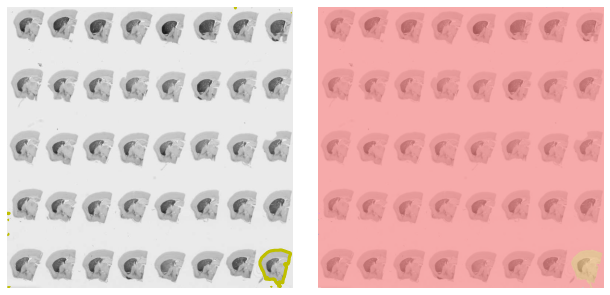

In [132]:
from skimage.color import label2rgb
from skimage import segmentation
from skimage.feature import canny
from skimage.filters import sobel

segmentation_coins = ndi.binary_fill_holes(segmentation_coins - 1)
labeled_coins, _ = ndi.label(segmentation_coins)
image_label_overlay = label2rgb(labeled_coins, image=coins, bg_label=10)

fig, axes = plt.subplots(1, 2, figsize=(9,9), sharey=True)
axes[0].imshow(coins, cmap=plt.cm.gray)
axes[0].contour(segmentation_coins, [0.95], linewidths=3, colors='y')
axes[1].imshow(image_label_overlay)

for a in axes:
    a.axis('off')

plt.tight_layout()

plt.show()
